# CHICAGO CRIME DETECTION ANALYSIS

### GRAND THEFT AUTO
You are hired as an Analyst by Chicago Police. They have been maintaining a database of "motor vehicle theft" (sometimes referred to as grand theft auto) since last few years. This is the act of stealing, or attempting to steal, a car.Due to increasing crimes, they want to make use of data to strategize better to maintain peace and order in their State. As a part of their Analyst team, you have been posed with some questions given below. Use your gained Data Analysis skills to answer these questions and help of the Police Department!

### Data Columns details:
1. ID: a unique identifier for each observation.

2. Date: the date the crime occurred.
LocationDescription: the location where the crime occurred.

3. Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

4. Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

5. Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

6. District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

7. CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

8. Year: the year in which the crime occurred.
Latitude: the latitude of the location at which the crime occurred.


### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [202]:
df=pd.read_csv('data/Chicago_Crime_Detective.csv')

/home/manan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [203]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


## Whenever we solve a EDA problem, we begin by checking for the missing values:

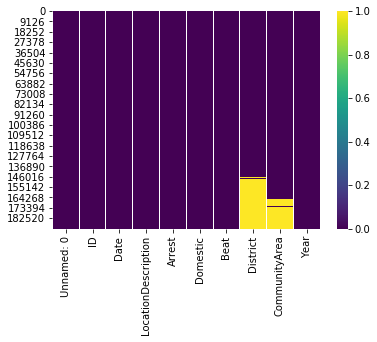

In [4]:

sns.heatmap(df.isnull(),cmap='viridis')

## Q) What is the Month and Year of the median date in our dataset?

In [5]:
df['Date']=pd.to_datetime(df.Date)
dates = list(df.sort_values('Date')['Date'])
dates[len(dates)//2]
#df.Date.loc[:].quantile(0.5)

Timestamp('2006-05-21 12:30:00')

## Q)In which month did the lowest motor vehicle thefts occur? 

In [6]:
df.Date.dt.month_name().value_counts()
#February

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Date, dtype: int64

## Q) On which weekday did most motor vehicle thefts occur? 

In [7]:

df.Date.dt.day_name().value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Date, dtype: int64

## Q) Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [191]:
df1 = df[df['Arrest']==True]
df1.Date.dt.month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Date, dtype: int64

### General trends of Crimes in Chicago yearly!

A Histogram will definitely help us in exploring the general trends yearly in chicago

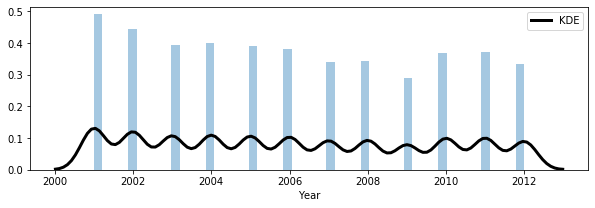

In [206]:
plt.figure(figsize=(10,3))
sns.distplot(df.Year, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"linewidth":15})
plt.show()

In [195]:
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

## Q) Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?

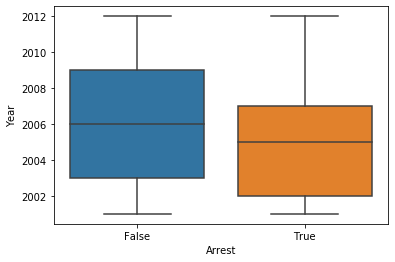

In [205]:
sns.boxplot(x='Arrest', y='Year', data=df)
plt.show()

Definitely in the first half

## Q)For what proportion of motor vehicle thefts in 2001 and 2007 was an arrest made?

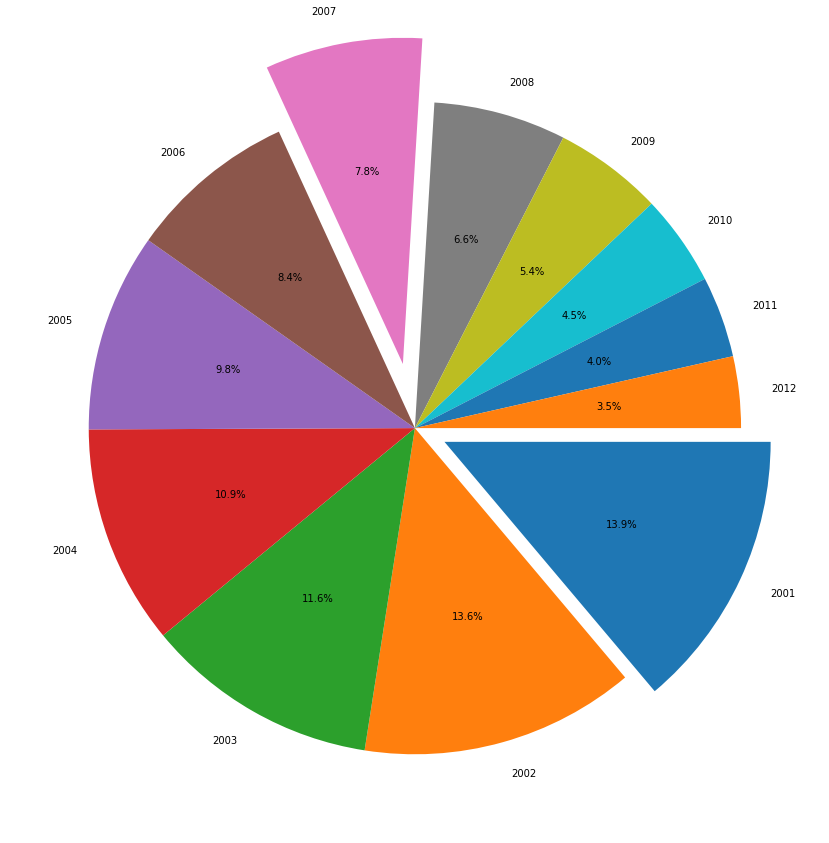

In [204]:
plt.figure(figsize=(20,15))
plt.pie(df1.Year.value_counts(), startangle=0,autopct='%1.1f%%', labels=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012'],explode=(0.1,0,0,0,0,0,0.2,0,0,0,0,0), counterclock=False)
plt.show()

In [196]:
df1.Year.value_counts()[2001]/df1.Year.value_counts().sum()

0.13851699279093718

In [197]:
df1.Year.value_counts()[2001]/df1.Year.value_counts().sum()

0.13851699279093718

## Q) Which locations are the top five locations for motor vehicle thefts?

In [131]:
df.LocationDescription.value_counts()

STREET                                         156564
PARKING LOT/GARAGE(NON.RESID.)                  14852
OTHER                                            4573
ALLEY                                            2308
GAS STATION                                      2111
                                                ...  
APPLIANCE STORE                                     1
ANIMAL HOSPITAL                                     1
NEWSSTAND                                           1
JAIL / LOCK-UP FACILITY                             1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
Name: LocationDescription, Length: 78, dtype: int64

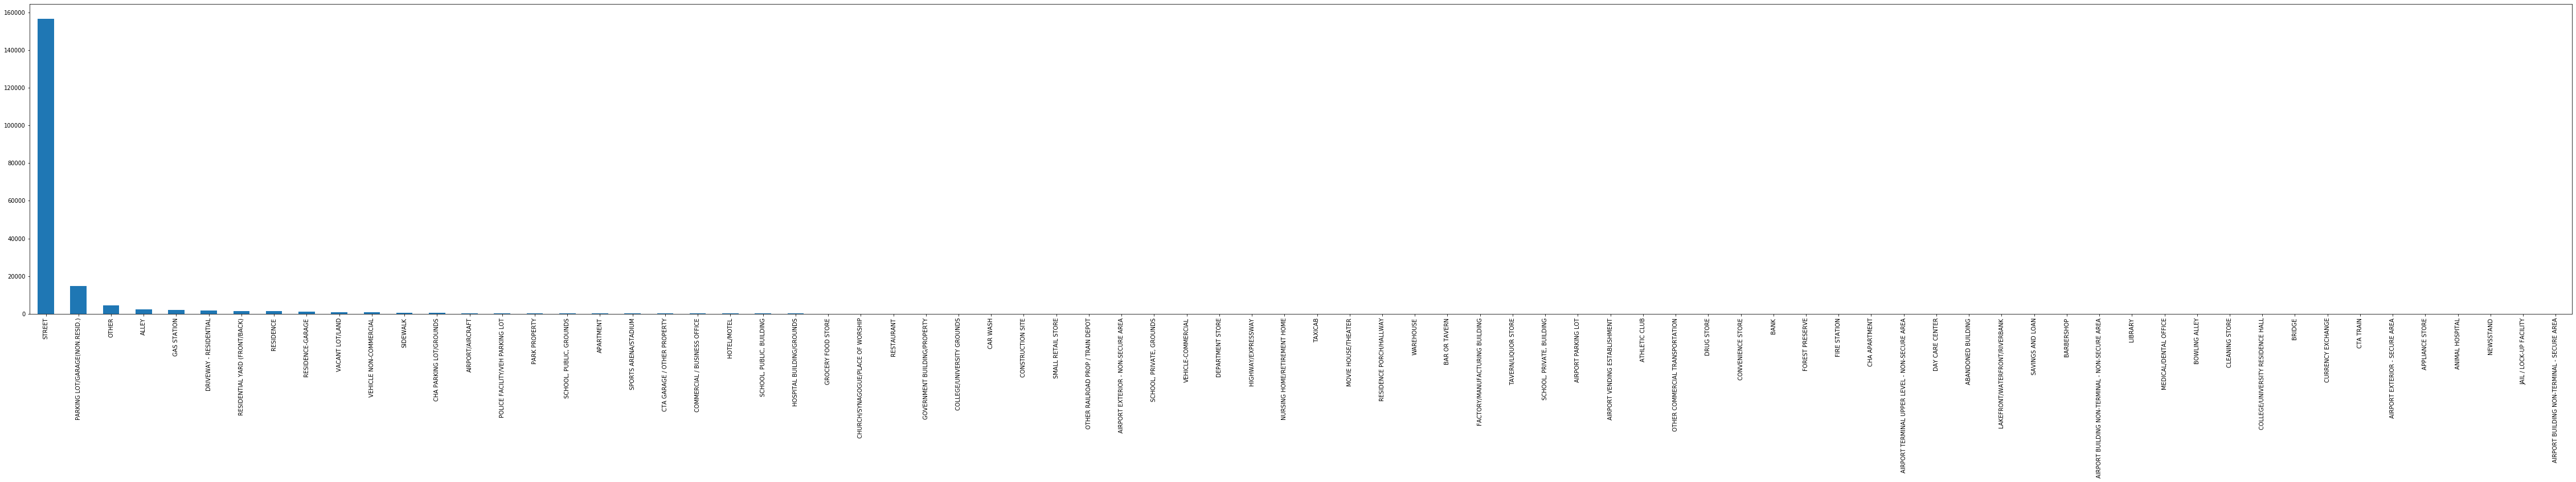

In [207]:
plt.figure(figsize=(80,10))
df.LocationDescription.value_counts().plot(kind='bar')
plt.show()

## Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [201]:
top5=[]
k=0
for value in df.LocationDescription:
    if value == 'GAS STATION':
        top5.append(value)
    elif value== 'STREET':
        top5.append(value)
    elif value== 'PARKING LOT/GARAGE(NON.RESID.)':
        top5.append(value)
    elif value== 'ALLEY':
        top5.append(value)
    elif value== 'DRIVEWAY - RESIDENTIAL':
        top5.append(value)
len(top5)
#this can be reduced using list comprehensions

177510

## Q) On which day of the week do the most motor vehicle thefts at gas stations happen?

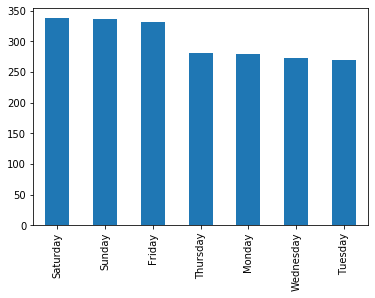

In [184]:
df[df.LocationDescription=='GAS STATION'].Date.dt.day_name().value_counts().plot(kind='bar')
#Everything in one statement this is why i love python!